# Data exploration

## I- Import relevant librairires

In [1]:
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

Below, you can import the different modules coded in ``WeakSegNet/src``

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..")) # This is the repo directory: WeakSegNet/
SRC_PATH = os.path.join(BASE_DIR, "src")
sys.path.append(SRC_PATH)

from data_loading import OxfordPet, data_loading

## II- Load the data

In [4]:
# Sanity check: are the trainval.txt and test.txt files available

FILE_PATH = os.path.join(BASE_DIR, "data")

split = "trainval" # or "test"
print(f"Looking for {split}.txt in:", os.path.join(FILE_PATH, "annotations", f"{split}.txt"))
print("Does the file exists?", os.path.exists(os.path.join(FILE_PATH, "annotations", "test.txt")))

Looking for trainval.txt in: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt
Does the file exists? True


In [6]:
batch_size_train, batch_size_test = 64, 32
train_dataset, test_dataset, train_loader, test_loader = data_loading(path=FILE_PATH,
                                                                      image_size=256,
                                                                      batch_size_train=batch_size_train,
                                                                      batch_size_test=batch_size_test
                                                                    )


----Loading data
Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt
Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\test.txt

[Data loaded succesfully]
Number of train+validation instances: 3680
Number of test instances: 3669


## III- Data visualisation

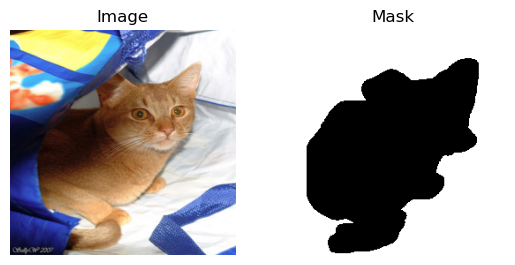

In [7]:
image, mask = train_dataset[0]

plt.subplot(1, 2, 1)
plt.imshow(image.permute(1, 2, 0)) 
plt.title("Image")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(mask.squeeze(), cmap='gray')
plt.title("Mask")
plt.axis(False)

plt.show()

##  IV- Data exploration

In [8]:
test = OxfordPet(data_dir=FILE_PATH, split="trainval", return_id=True)

Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt


In [9]:
test[0][2]

{'name': 'Abyssinian_100', 'class_id': 1, 'species_id': 1, 'breed_id': 1}

In [10]:
test_2 = OxfordPet(data_dir=FILE_PATH, split="trainval", return_id=False)

Loading split from: c:\Users\paulh\Desktop\gp1-pt\WeakSegNet\data\annotations\trainval.txt


In [11]:
test_2[0][1]

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])